<a href="https://colab.research.google.com/github/HongTuoi02/NguyenHongTuoi20104071/blob/main/Nhan_dang_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import validation
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/Flowers/

/content/drive/MyDrive/Colab Notebooks/BTVN/Flowers


In [ ]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Flowers/Train',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 82 images belonging to 3 classes.


In [ ]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Flowers/Test',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 10 images belonging to 3 classes.


In [ ]:
train_set.class_indices

{'Cuc': 0, 'Hong': 1, 'Mai': 2}

In [ ]:
test_set.class_indices

{'Cuc': 0, 'Hong': 1, 'Mai': 2}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=40,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/40
3/3 [==============================] - 59s 20s/step - loss: 64.6158 - accuracy: 0.3659 - val_loss: 14.4869 - val_accuracy: 0.4000
Epoch 2/40
3/3 [==============================] - 49s 14s/step - loss: 9.1444 - accuracy: 0.2927 - val_loss: 1.8358 - val_accuracy: 0.2000
Epoch 3/40
3/3 [==============================] - 46s 14s/step - loss: 1.5184 - accuracy: 0.4268 - val_loss: 1.2479 - val_accuracy: 0.2000
Epoch 4/40
3/3 [==============================] - 46s 18s/step - loss: 1.0171 - accuracy: 0.5122 - val_loss: 0.9370 - val_accuracy: 0.5000
Epoch 5/40
3/3 [==============================] - 46s 18s/step - loss: 0.8342 - accuracy: 0.6463 - val_loss: 0.8394 - val_accuracy: 0.5000
Epoch 6/40
3/3 [==============================] - 48s 14s/step - loss: 0.9834 - accuracy: 0.5854 - val_loss: 0.8438 - val_accuracy: 0.7000
Epoch 7/40
3/3 [==============================] - 46s 18s/step - loss: 0.5988 - accuracy: 0.7805 - val_loss: 0.4588 - val_accuracy: 1.0000
Epoch 8/40
3/3 [=========

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/BTVN/Flowers/Nhan_dang_hoa.h5')

In [ ]:
model_hoa = load_model('/content/drive/MyDrive/Colab Notebooks/BTVN/Flowers/Nhan_dang_hoa.h5')

In [ ]:
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0002373189781792462
Train Accuracy 1.0


1/1 [==============================] - 0s 279ms/step
Cuc


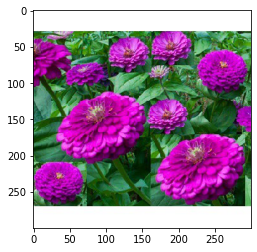

1/1 [==============================] - 0s 249ms/step
Hong


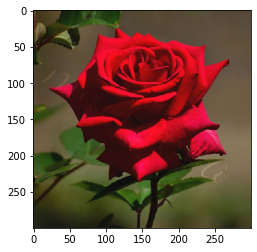

1/1 [==============================] - 0s 159ms/step
Mai


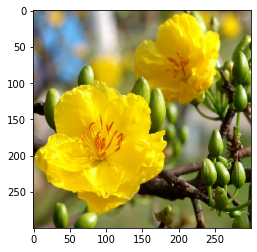

In [ ]:
test='/content/drive/MyDrive/Colab Notebooks/BTVN/Flowers/Validation'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_hoa.predict(img)
  if round(result[0][0])==1:
    prediction='Cuc'
  if round(result[0][1])==1:
    prediction = 'Hong'
  if round(result[0][2])==1:
    prediction='Mai'
  print(prediction)
  plt.show()